# 📧 Email Spam or Not
### Introduction
This project develops a machine learning model to classify messages as spam or legitimate (ham) using text content. 

### Required Libraries

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.impute import KNNImputer
from pylab import rcParams
from pathlib import Path

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay,classification_report
from sklearn.metrics import f1_score

### Load Dataset

In [5]:
# Create directory for images 
Path("img").mkdir(parents=True, exist_ok=True)

# Set default figure size
rcParams['figure.figsize'] = (4, 4)

# Tell pandas how to display floats
pd.options.display.float_format = "{:,.2f}".format

In [6]:
path = "Downloads/spam_dataset.csv"

In [7]:
df = pd.read_csv(path, lineterminator='\n')

### Initial Exploration

In [9]:
df.head()

,message_content,is_spam\r
0,"Hello Lonnie,\n\nJust wanted to touch base reg...",0
1,"Congratulations, you've won a prize! Call us n...",1
2,You have been pre-approved for a credit card w...,1
3,"Limited time offer, act now! Only a few spots ...",1
4,Your loan has been approved! Transfer funds to...,1


In [10]:
df.isnull().sum()

message_content    0
is_spam\r          0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   message_content  1000 non-null   object
         1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [12]:
df.shape

(1000, 2)

In [13]:
df.nunique()

message_content    677
is_spam\r            2
dtype: int64

In [14]:
df.columns.tolist()

['message_content', 'is_spam\r']

Text(0.5, 1.0, 'Spam vs. Not Spam Messages')

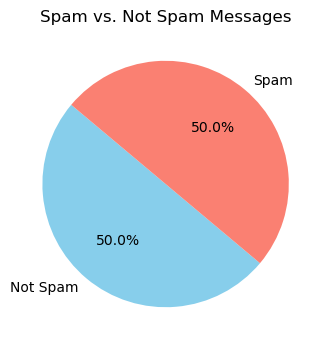

In [15]:
spam_counts =df['is_spam\r'].value_counts()
labels = ['Not Spam', 'Spam']
colors = ['skyblue', 'salmon']

plt.pie(spam_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title("Spam vs. Not Spam Messages")

### Encoding

In [17]:
X=df["message_content"]
y=df["is_spam\r"]

In [18]:
# Encoding the text data as TF-IDF features
vectorizer=TfidfVectorizer(stop_words='english', max_features=1000)
X_tfidf=vectorizer.fit_transform(X)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y,
    test_size=0.2,       
    random_state=42,      
    stratify=y            
)

In [20]:
print(f"Train: {X_train.getnnz()} samples")
print(f"Test: {X_test.getnnz()} samples")

Train: 22109 samples
Test: 5483 samples


### Logistic Regression Model

In [22]:
logreg = LogisticRegression() #Budiling Model

logreg.fit(X_train, y_train)

LogisticRegression()

In [23]:
y_predicted_logreg = logreg.predict(X_test)

In [24]:
y_predicted_logreg[:10]

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0], dtype=int64)

In [25]:
np.array(y_test)[:10]

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0], dtype=int64)

### Random Forest Classifier Model

In [27]:
rf = RandomForestClassifier(n_estimators=20, max_depth=10) #Budiling Mode

In [28]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=20)

In [29]:
y_predicted_rf = rf.predict(X_test)
y_predicted_rf[:10]

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0], dtype=int64)

In [30]:
np.array(y_test)[:10]

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0], dtype=int64)

### Evaluate the model and compare it

In [32]:
print (classification_report(y_test, y_predicted_logreg))
#Logistic Regression Model

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       100

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [33]:
print (classification_report(y_test, y_predicted_rf))
#Random Forest Classifier Model

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       100

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [34]:
confusion_matrix(y_test, y_predicted_logreg)

array([[100,   0],
       [  0, 100]], dtype=int64)

In [35]:
confusion_matrix(y_test, y_predicted_rf)

array([[100,   0],
       [  0, 100]], dtype=int64)

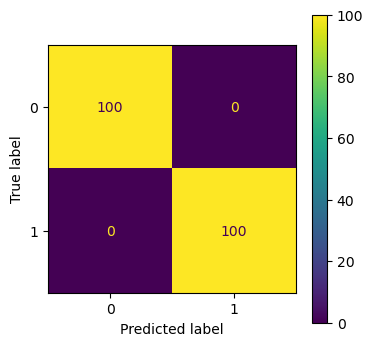

In [36]:
#Logistic Regression Model
ConfusionMatrixDisplay.from_predictions(y_test, y_predicted_logreg);

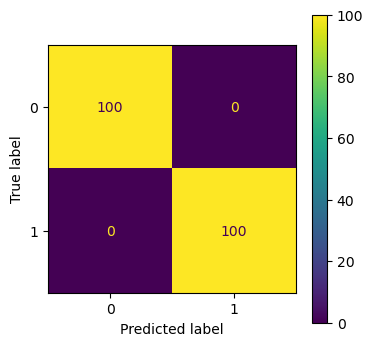

In [37]:
#Random Forest Classifier Model
ConfusionMatrixDisplay.from_predictions(y_test, y_predicted_rf);